# Modelos Predictivos  Parte I

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# importacion de los datos a df_agro
df_agro = pd.read_csv(r'..\\Bases de datos\\EvaluacionAgro02.csv',sep=';')
df_agro.head()

,Dpto,Municipio,desagregacionCultivo,Cultivo,cicloDelCultivo,grupoCultivo,Subgrupo,Anio,Periodo,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa,nombreCientificoCultivo,estadoFisicoCultivo
0,Boyacá,Tunja,Fresa,Fresa,Permanente,Frutales,Demas frutales,2019,C,3.0,3.0,30.0,10.0,Fragaria vesca,En fresco
1,Boyacá,Tunja,Avena,Avena,Transitorio,Cereales,Cereales,2019,A,160.0,160.0,480.0,3.0,Avena sativa,En fresco
2,Boyacá,Tunja,Cebada,Cebada,Transitorio,Cereales,Cereales,2019,A,20.0,20.0,60.0,3.0,Hordeum vulgare,En fresco
3,Boyacá,Tunja,Maíz Tradicional,Maíz,Transitorio,Cereales,Cereales,2019,A,180.0,180.0,360.0,2.0,Zea mays,En fresco
4,Boyacá,Tunja,Cebolla De Bulbo,Cebolla De Bulbo,Transitorio,Hortalizas,Hortalizas de raíz,2019,A,120.0,120.0,2400.0,20.0,Allium cepa,En fresco


In [3]:
df_agro.shape

(17743, 15)

# *Modelo de regresión para la predicción del rendimientoTonHa de cultivos.*

## 1. Técnicas de preprocesamiento de datos

### 1.1. Label Encoding

In [4]:
df_agro['grupoCultivoOrd'] = df_agro['grupoCultivo'].map(
    {   'Frutales':1
        ,'Hortalizas':2
        ,'Leguminosas':3
        ,'Raíces y Tubérculos':4
        ,'Cereales':5
        ,'Cultivos Tropicales Tradicionales':6
        ,'Condimentos Bebidas y Aromáticas':7
        ,'Oleaginosas':8
    })
df_agro['EstadoFinalOrd'] = df_agro['estadoFisicoCultivo'].map({
        'En fresco':0
        ,'Grano seco':1
        ,'Grano':2
        ,'Pergamino o seco de trilla':3
        ,'Caña o verde':4
        ,'Paddy o cascara verde':5
        ,'Fibra o cabuya':6
        ,'Aceite crudo':7
        ,'Algodón semilla':8
})
# df_agro['EstadoFinalFre'] = df_agro['estadoFisicoCultivo'].map(df_agro['estadoFisicoCultivo'].value_counts().to_dict())
df_agro['PeriodoOrd'] = df_agro['Periodo'].map({'A':0,'B':1,'C':2})
# df_agro['DptoOrd'] = df_agro['Dpto'].map({'Boyacá':0,'Cundinamarca':1})
df_agro['CicloOrd'] = df_agro['cicloDelCultivo'].map({'Transitorio':0,'Permanente':1})
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df_agro['CultivoOrd'] = label_encoder.fit_transform(df_agro['Cultivo'])

### 1.2. Frequency Encoding:

In [5]:
dict_cultivo = df_agro['Cultivo'].value_counts().to_dict()
df_agro['CultivoFre'] = df_agro['Cultivo'].map(dict_cultivo)
df_agro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17743 entries, 0 to 17742
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dpto                     17743 non-null  object 
 1   Municipio                17743 non-null  object 
 2   desagregacionCultivo     17743 non-null  object 
 3   Cultivo                  17743 non-null  object 
 4   cicloDelCultivo          17743 non-null  object 
 5   grupoCultivo             17743 non-null  object 
 6   Subgrupo                 17743 non-null  object 
 7   Anio                     17743 non-null  int64  
 8   Periodo                  17743 non-null  object 
 9   areaSembradaHa           17743 non-null  float64
 10  areaCosechadaHa          17743 non-null  float64
 11  produccionTon            17743 non-null  float64
 12  rendimientoTonHa         17743 non-null  float64
 13  nombreCientificoCultivo  17743 non-null  object 
 14  estadoFisicoCultivo   

In [6]:
df_agro.head()

,Dpto,Municipio,desagregacionCultivo,Cultivo,cicloDelCultivo,grupoCultivo,Subgrupo,Anio,Periodo,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa,nombreCientificoCultivo,estadoFisicoCultivo,grupoCultivoOrd,EstadoFinalOrd,PeriodoOrd,CicloOrd,CultivoFre
0,Boyacá,Tunja,Fresa,Fresa,Permanente,Frutales,Demas frutales,2019,C,3.0,3.0,30.0,10.0,Fragaria vesca,En fresco,1,0,2,1,223
1,Boyacá,Tunja,Avena,Avena,Transitorio,Cereales,Cereales,2019,A,160.0,160.0,480.0,3.0,Avena sativa,En fresco,5,0,0,0,88
2,Boyacá,Tunja,Cebada,Cebada,Transitorio,Cereales,Cereales,2019,A,20.0,20.0,60.0,3.0,Hordeum vulgare,En fresco,5,0,0,0,186
3,Boyacá,Tunja,Maíz Tradicional,Maíz,Transitorio,Cereales,Cereales,2019,A,180.0,180.0,360.0,2.0,Zea mays,En fresco,5,0,0,0,1624
4,Boyacá,Tunja,Cebolla De Bulbo,Cebolla De Bulbo,Transitorio,Hortalizas,Hortalizas de raíz,2019,A,120.0,120.0,2400.0,20.0,Allium cepa,En fresco,2,0,0,0,541


### 1.3. Depuración de variables

In [7]:
df_agro_Nuevo = df_agro.drop(columns=['Dpto','Municipio','nombreCientificoCultivo','Subgrupo',
                                      'desagregacionCultivo','areaCosechadaHa','cicloDelCultivo',
                                      'Periodo','estadoFisicoCultivo','Anio']) 
df_agro_Nuevo.head()

,Cultivo,grupoCultivo,areaSembradaHa,produccionTon,rendimientoTonHa,grupoCultivoOrd,EstadoFinalOrd,PeriodoOrd,CicloOrd,CultivoFre
0,Fresa,Frutales,3.0,30.0,10.0,1,0,2,1,223
1,Avena,Cereales,160.0,480.0,3.0,5,0,0,0,88
2,Cebada,Cereales,20.0,60.0,3.0,5,0,0,0,186
3,Maíz,Cereales,180.0,360.0,2.0,5,0,0,0,1624
4,Cebolla De Bulbo,Hortalizas,120.0,2400.0,20.0,2,0,0,0,541


In [8]:
df_agro_Nuevo.describe().T

,count,mean,std,min,25%,50%,75%,max
areaSembradaHa,17743.0,92.271643,368.156547,0.0,5.00,15.0,51.000,9123.0
produccionTon,17743.0,1748.450272,15001.241647,0.0,15.62,72.0,369.575,576000.0
rendimientoTonHa,17743.0,11.409525,16.263258,0.0,1.69,7.0,15.000,640.0
grupoCultivoOrd,17743.0,2.898946,1.681824,1.0,1.00,3.0,4.000,8.0
EstadoFinalOrd,17743.0,0.472017,0.973781,0.0,0.00,0.0,1.000,8.0
PeriodoOrd,17743.0,1.012399,0.837531,0.0,0.00,1.0,2.000,2.0
CicloOrd,17743.0,0.356253,0.478905,0.0,0.00,0.0,1.000,1.0
CultivoFre,17743.0,647.344699,556.230785,1.0,215.00,394.0,1090.000,1624.0


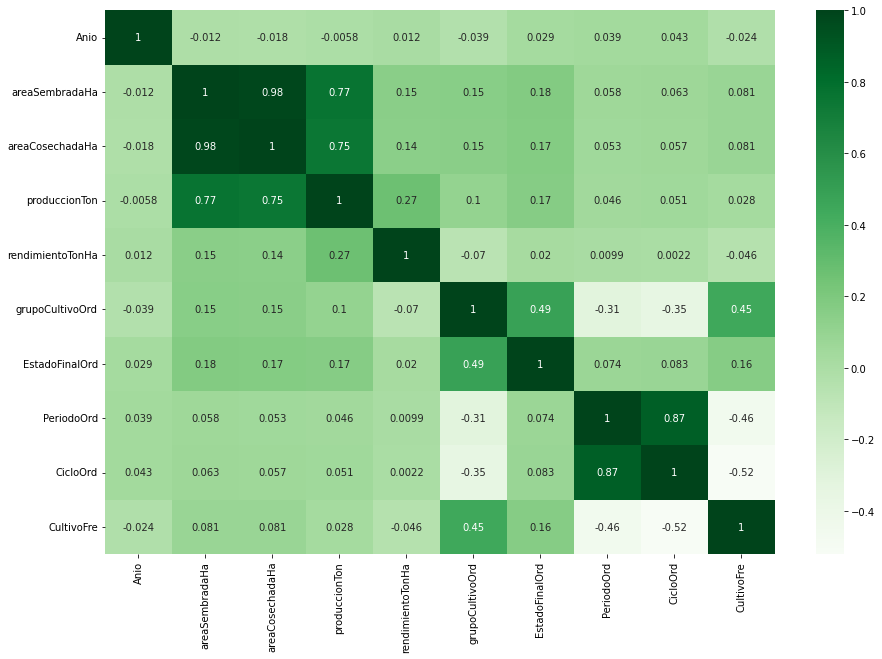

In [9]:
import seaborn as sns
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_agro.corr(),annot=True,cmap='Greens')
plt.show()

### 1.4. Estandarización de los datos

Se estandarizan los datos bajo los parametros de :

$$\mu \approx 0$$

$$\sigma  = 1$$

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df_agro_Nuevo.drop(columns=['rendimientoTonHa']).iloc[:,2:]
y = df_agro_Nuevo['rendimientoTonHa']

X_scaler = scaler.fit_transform(X)
print(X_scaler.mean())
print(X_scaler.var())

-1.5560875043417305e-17
1.0


### 1.5. Reducción de la dimensionalidad usando PCA

In [11]:
from sklearn.decomposition import PCA

pca= PCA(n_components=6)
X_Pca=pca.fit_transform(X_scaler)
print(X_Pca)

[[-2.27559101 -0.11536979  0.1010148  -0.36157506  0.08742694  0.08563312]
 [ 1.01629889 -0.27435731  0.37248849  1.49073253 -1.12653938 -0.22858286]
 [ 1.07338329 -0.52125395  0.22030564  1.35929469 -1.06882422  0.03189008]
 ...
 [ 2.4599618  -0.10986219 -0.63408376 -0.58009387 -0.00780615  0.14134577]
 [ 1.71789883  0.01516619 -0.72431252  0.2093522   1.34875153 -0.10421791]
 [ 1.09260776  0.248373   -1.04265757 -0.21454423  1.13215436  0.01752294]]


In [12]:
varianza=pca.explained_variance_ratio_
print(varianza)
print(varianza.sum())

[0.36326851 0.27902172 0.1730174  0.07786985 0.05649877 0.03249997]
0.9821762168966752


### 1.6. Técnica de Preprocesamiento One hot Encoding 

In [13]:
df_agro_One = pd.get_dummies(df_agro,columns=['Periodo','cicloDelCultivo','grupoCultivo','Dpto','estadoFisicoCultivo'])
df_agro_One.rename(columns={
        'Municipio':'Municipio', 
        'desagregacionCultivo':'desagregacionCultivo', 
        'Cultivo':'Cultivo', 
        'Subgrupo':'Subgrupo', 
        'Anio':'Anio',
        'areaSembradaHa':'areaSembradaHa',
        'areaCosechadaHa':'areaCosechadaHa',
        'produccionTon':'produccionTon',
        'rendimientoTonHa':'rendimientoTonHa', 
        'nombreCientificoCultivo':'nombreCientificoCultivo', 
        'Periodo_A':'A', 
        'Periodo_B':'B',
        'Periodo_C':'C', 
        'cicloDelCultivo_Permanente':'CicloPermanente',
        'cicloDelCultivo_Transitorio':'CicloTransitorio',
        'grupoCultivo_Cereales':'GpCereales',
        'grupoCultivo_Condimentos Bebidas y Aromáticas':'GpCondimentosBebidasAromáticas',
        'grupoCultivo_Cultivos Tropicales Tradicionales':'GpTropicalesTradicionales',
        'grupoCultivo_Frutales':'GpFrutales',
        'grupoCultivo_Hortalizas':'GpHortalizas',
        'grupoCultivo_Leguminosas':'GpLeguminosas', 
        'grupoCultivo_Oleaginosas':'GpOleaginosas',
        'grupoCultivo_Raíces y Tubérculos':'GpRaicesTuberculos', 
        'Dpto_Boyacá':'Boyaca', 
        'Dpto_Cundinamarca':'Cundinamarca',
        'estadoFisicoCultivo_Aceite crudo':'EdoAceiteCrudo',
        'estadoFisicoCultivo_Algodón semilla':'EdoAlgodónSemilla',
        'estadoFisicoCultivo_Caña o verde':'EdoCañaVerde',
        'estadoFisicoCultivo_En fresco':'Edofresco',
        'estadoFisicoCultivo_Fibra o cabuya':'EdoFibraCabuya',
        'estadoFisicoCultivo_Grano':'EdoGrano',
        'estadoFisicoCultivo_Grano seco':'EdoGranoSeco',
        'estadoFisicoCultivo_Paddy o cascara verde':'EdoPaddyCascaraVerde',
        'estadoFisicoCultivo_Pergamino o seco de trilla':'EdoSecoTrilla'
       },inplace=True)
df_agro_One.shape

(17743, 39)

In [14]:
df_agro_One.head()

,Municipio,desagregacionCultivo,Cultivo,Subgrupo,Anio,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa,nombreCientificoCultivo,...,Cundinamarca,EdoAceiteCrudo,EdoAlgodónSemilla,EdoCañaVerde,Edofresco,EdoFibraCabuya,EdoGrano,EdoGranoSeco,EdoPaddyCascaraVerde,EdoSecoTrilla
0,Tunja,Fresa,Fresa,Demas frutales,2019,3.0,3.0,30.0,10.0,Fragaria vesca,...,0,0,0,0,1,0,0,0,0,0
1,Tunja,Avena,Avena,Cereales,2019,160.0,160.0,480.0,3.0,Avena sativa,...,0,0,0,0,1,0,0,0,0,0
2,Tunja,Cebada,Cebada,Cereales,2019,20.0,20.0,60.0,3.0,Hordeum vulgare,...,0,0,0,0,1,0,0,0,0,0
3,Tunja,Maíz Tradicional,Maíz,Cereales,2019,180.0,180.0,360.0,2.0,Zea mays,...,0,0,0,0,1,0,0,0,0,0
4,Tunja,Cebolla De Bulbo,Cebolla De Bulbo,Hortalizas de raíz,2019,120.0,120.0,2400.0,20.0,Allium cepa,...,0,0,0,0,1,0,0,0,0,0


In [15]:
df_agro_One = df_agro_One.drop(columns=['Municipio','nombreCientificoCultivo','Subgrupo','desagregacionCultivo','areaCosechadaHa','grupoCultivoOrd','EstadoFinalOrd','PeriodoOrd',
                                        'CicloOrd']) 

In [16]:
df_agro_One.head()

,Cultivo,Anio,areaSembradaHa,produccionTon,rendimientoTonHa,CultivoFre,A,B,C,CicloPermanente,...,Cundinamarca,EdoAceiteCrudo,EdoAlgodónSemilla,EdoCañaVerde,Edofresco,EdoFibraCabuya,EdoGrano,EdoGranoSeco,EdoPaddyCascaraVerde,EdoSecoTrilla
0,Fresa,2019,3.0,30.0,10.0,223,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,Avena,2019,160.0,480.0,3.0,88,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Cebada,2019,20.0,60.0,3.0,186,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Maíz,2019,180.0,360.0,2.0,1624,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Cebolla De Bulbo,2019,120.0,2400.0,20.0,541,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### 1.7. División del conjunto de datos

Se decide dividir el conjunto en datos de entrenamiento y en prueba, siendo este el 20% de los datos

In [17]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_Pca,y,test_size=0.2,random_state=42)

## 2. Modelo de regresión

### 2.1. Árboles de decisión con datos de frecuecia

In [18]:
from sklearn.tree import DecisionTreeRegressor
modelo_tree = DecisionTreeRegressor(random_state=42,max_depth=20)
modelo_tree.fit(X_train,y_train)
# modelo_tree.get_depth()
y_predict_tree = modelo_tree.predict(X_test)

# print(y_predict[0:10])
# print(y_test[0:10].values)

#### 2.1.1 Evaluación del modelo

$$MSE = \dfrac{\sum_{i}^{n}(y_{\text{test}}-\hat{y}_{\text{predict}})^2}{n}$$

$$RMSE = \sqrt{\dfrac{\sum_{i}^{n}(y_{\text{test}}-\hat{y}_{\text{predict}})^2}{n}}$$

In [19]:
# error cuadratico medio
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test,y_predict_tree)
print(f'R^2 = {modelo_tree.score(X_test,y_test):.3f}')
print(f'MSE = {mse:.3f}')
print(f'RMSE = {math.sqrt(mse):.3f}')

R^2 = 0.855
MSE = 36.455
RMSE = 6.038


Valores aceptado debe estan definido en el rango
$$ y = \hat{y}_{\_\text{predict}} \pm \text{RMSE} $$

In [20]:
print(y_predict_tree[0:10])
print(y_test[0:10].values)

[11.92857143 25.         14.70245902  9.          4.91       20.47222222
  8.88833333 15.          6.         27.        ]
[10. 22. 10.  9.  4. 22. 11.  5.  7. 25.]


In [21]:
X_grafica =pd.DataFrame(data=X_Pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
X_grafica

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,-2.275591,-0.115370,0.101015,-0.361575,0.087427,0.085633
1,1.016299,-0.274357,0.372488,1.490733,-1.126539,-0.228583
2,1.073383,-0.521254,0.220306,1.359295,-1.068824,0.031890
3,2.343979,-0.203588,0.191657,-0.862682,-0.647423,-0.081042
4,0.653769,-0.627791,1.096255,0.575230,0.373366,-0.157758
...,...,...,...,...,...,...
17738,1.093528,0.256630,-1.038081,-0.215296,1.131111,0.007898
17739,0.877356,-0.098794,-0.346472,-0.350371,0.494716,0.046586
17740,2.459962,-0.109862,-0.634084,-0.580094,-0.007806,0.141346
17741,1.717899,0.015166,-0.724313,0.209352,1.348752,-0.104218


In [22]:
from sklearn import tree 
import matplotlib.pyplot as plt

# for arbol in (modelo_tree_clas.tree_):
plt.figure(figsize=(20,10))
print(tree.export_text(modelo_tree,feature_names=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'],max_depth=2))
# plt.show()

|--- PCA3 <= 0.58
|   |--- PCA3 <= -3.23
|   |   |--- PCA6 <= 0.44
|   |   |   |--- truncated branch of depth 18
|   |   |--- PCA6 >  0.44
|   |   |   |--- truncated branch of depth 4
|   |--- PCA3 >  -3.23
|   |   |--- PCA3 <= -0.03
|   |   |   |--- truncated branch of depth 18
|   |   |--- PCA3 >  -0.03
|   |   |   |--- truncated branch of depth 18
|--- PCA3 >  0.58
|   |--- PCA6 <= 0.10
|   |   |--- PCA5 <= 0.48
|   |   |   |--- truncated branch of depth 18
|   |   |--- PCA5 >  0.48
|   |   |   |--- truncated branch of depth 11
|   |--- PCA6 >  0.10
|   |   |--- PCA5 <= 0.27
|   |   |   |--- truncated branch of depth 9
|   |   |--- PCA5 >  0.27
|   |   |   |--- truncated branch of depth 15



<Figure size 1440x720 with 0 Axes>

### 2.2. Árboles de decisión con One hot Encoding

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_one = df_agro_One.drop(columns='rendimientoTonHa').iloc[:,1:]
y_one = df_agro_One['rendimientoTonHa']

X_scaler_one = scaler.fit_transform(X_one)
# print(X_scaler_one.mean())
# print(X_scaler_one.var())
from sklearn.decomposition import PCA

pca= PCA(n_components=16)
X_Pca_one=pca.fit_transform(X_scaler_one)
# print(X_Pca_one)
varianza=pca.explained_variance_ratio_
# print(varianza)
# print(varianza.sum())
from  sklearn.model_selection import train_test_split
X_train_one,X_test_one,y_train_one,y_test_one = train_test_split(X_Pca_one,y_one,test_size=0.2,random_state=42)

### Modelo de regresión con árboles de decisión

from sklearn.tree import DecisionTreeRegressor
modelo_tree = DecisionTreeRegressor()
modelo_tree.fit(X_train_one,y_train_one)
y_predict_one = modelo_tree.predict(X_test_one)

print(y_predict_one[0:10])
print(y_test_one[0:10].values)

[ 3.  30.   6.  10.   4.  18.   5.4  2.   1.2 25. ]
[10. 22. 10.  9.  4. 22. 11.  5.  7. 25.]


In [24]:
print(f'R^2 = {modelo_tree.score(X_test_one,y_test_one):.2f}')
mse_one = mean_squared_error(y_test_one,y_predict_one)
print(f'MSE = {mse_one:.2f}')
print(f'RMSE = {math.sqrt(mse_one):.2f}')

R^2 = 0.70
MSE = 76.54
RMSE = 8.75


### 2.3. Bosques aleatorios de Regresión

In [25]:
from sklearn.ensemble import RandomForestRegressor

X_train_forest,X_test_forest,y_train_forest,y_test_forest = train_test_split(X_scaler,y,test_size=0.3,random_state=42)


modelo_Forest_Regressor = RandomForestRegressor(n_estimators=100,
                                                max_depth=8,
                                                random_state=42)
modelo_Forest_Regressor.fit(X_train_forest,y_train_forest)
# modelo_Forest_Regressor.get_params()

RandomForestRegressor(max_depth=8, random_state=42)

In [26]:
# error cuadratico medio
y_predict_rf = modelo_Forest_Regressor.predict(X_test_forest)

print(f'R^2  = {modelo_Forest_Regressor.score(X_test_forest,y_test_forest):.3f}')
mse = mean_squared_error(y_test_forest,y_predict_rf)
print(f'MSE  = {mse:.3f}')
print(f'RMSE = {math.sqrt(mse):.3f}')

R^2  = 0.888
MSE  = 28.842
RMSE = 5.370


In [27]:
print(y_predict_rf[0:5])
print(y_test_forest[0:5].values)

[12.00688292 20.75858672 13.67774182  8.36807423  6.17702077]
[10. 22. 10.  9.  4.]


#### 2.3.1  Ajuste de los HiperParametros

In [28]:
from sklearn.model_selection import GridSearchCV

parametros_regresion = {'max_depth':(32,16,8),
                        'n_estimators':(100,50,20)
                         }

modelo_Forest_Regressor = RandomForestRegressor(random_state=42)

In [29]:
hiperParametros= GridSearchCV(modelo_Forest_Regressor,
                                parametros_regresion,
                                scoring='r2')

hiperParametros.fit(X_train_forest,y_train_forest)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': (32, 16, 8),
                         'n_estimators': (100, 50, 20)},
             scoring='r2')

In [30]:
print(hiperParametros.best_score_)
print(hiperParametros.best_params_)
mejor_A=hiperParametros.best_estimator_

0.8780727546622085
{'max_depth': 16, 'n_estimators': 100}


In [31]:
y_predict_rfh= mejor_A.predict(X_test_forest)

print(f'R^2  = {mejor_A.score(X_test_forest,y_test_forest):.3f}')
mse = mean_squared_error(y_test_forest,y_predict_rfh)
print(f'MSE  = {mse:.3f}')
print(f'RMSE = {math.sqrt(mse):.3f}')

R^2  = 0.942
MSE  = 14.981
RMSE = 3.871


In [32]:
# print(hiperParametros.cv_results_["rank_test_score"])
# print(hiperParametros.cv_results_["mean_test_score"])

### 2.4. SVM de regresión

In [33]:
# df_agro_Nuevo.to_csv(r'..\\Bases de datos\\EvaluacionAgro03.csv',sep=';',index=False)